In [ ]:
#! /usr/bin/env python 
# -*- coding: utf-8

"""
Python implementation of Non-Stationary Gabor Transform (NSGT)
derived from MATLAB code by NUHAG, University of Vienna, Austria

Thomas Grill, 2011-2016
http://grrrr.org/nsgt
"""

import os
from warnings import warn
import torch
import numpy
from nsgt.plot import spectrogram

from nsgt import NSGT, NSGT_sliced, LogScale, LinScale, MelScale, OctScale, VQLogScale, BarkScale, SndReader
from nsgt.fscale import Pow2Scale


import matplotlib.pyplot as plt



PATH = "guitar.wav"
if not os.path.exists(PATH):
    print("Input file '%s' not found"%PATH)
    exit(1)

fs = 44100
# build transform
scale = OctScale

fmin, fmax = 30, 22050
nbins = 48
scl = scale(fmin, fmax, nbins)


freqs, qs = scl()


# Read audio data
sf = SndReader(PATH, sr=fs, chns=2)
signal = sf()

signal = [torch.tensor(sig) for sig in signal]
signal = torch.cat(signal, dim=-1)

# duration of signal in s
dur = sf.frames/float(fs)

sllen, trlen = scl.suggested_sllen_trlen(fs)

# A Nonsliced NSGT
slicq = NSGT(scl, fs, signal.shape[-1],
                real=True,
                matrixform=True, 
                multichannel=True,
                device="cpu"
                )



# total number of coefficients to represent input signal
#ncoefs = int(sf.frames*slicq.coef_factor)

# generator for forward transformation
c = slicq.forward(signal)

# convert complex tensor to real tensor by taking the magnitude
c = torch.abs(c)

# add a batch
# c = torch.unsqueeze(c, dim=0)

print(c.shape)

transform_name = 'NSGT'

if fmin > 0.0:
    freqs = numpy.r_[[0.], freqs]

## #! /usr/bin/env python 
# -*- coding: utf-8

"""
Python implementation of Non-Stationary Gabor Transform (NSGT)
derived from MATLAB code by NUHAG, University of Vienna, Austria

Thomas Grill, 2011-2016
http://grrrr.org/nsgt
"""

import os
from warnings import warn
import torch
import numpy
from nsgt.plot import spectrogram

from nsgt import NSGT, NSGT_sliced, LogScale, LinScale, MelScale, OctScale, VQLogScale, BarkScale, SndReader
from nsgt.fscale import Pow2Scale


import matplotlib.pyplot as plt



PATH = "guitar.wav"
if not os.path.exists(PATH):
    print("Input file '%s' not found"%PATH)
    exit(1)

fs = 44100
# build transform
scale = OctScale

fmin, fmax = 30, 22050
nbins = 48
scl = scale(fmin, fmax, nbins)


freqs, qs = scl()


# Read audio data
sf = SndReader(PATH, sr=fs, chns=2)
signal = sf()

signal = [torch.tensor(sig) for sig in signal]
signal = torch.cat(signal, dim=-1)
# mix down signal to mono
mono = torch.mean(signal, dim=0)
signal = torch.unsqueeze(mono, dim=0)


# duration of signal in s
dur = sf.frames/float(fs)

sllen, trlen = scl.suggested_sllen_trlen(fs)

# A Nonsliced NSGT
slicq = NSGT(scl, fs, signal.shape[-1],
                real=True,
                matrixform=True, 
                multichannel=True,
                device="cpu"
                )



# total number of coefficients to represent input signal
#ncoefs = int(sf.frames*slicq.coef_factor)

# generator for forward transformation
c = slicq.forward(signal)

# add a batch
# c = torch.unsqueeze(c, dim=0)

print(c.shape)

transform_name = 'NSGT'

if fmin > 0.0:
    freqs = numpy.r_[[0.], freqs]

mag = torch.abs(c)

(mag < 0.0).any()

/home/minf/miniconda3/envs/nsgt-torch/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


torch.Size([2, 461, 19377])


/home/minf/nsgt/nsgt/nsgfwin_sl.py:66: UserWarning: Q-factor too high for frequencies 30.00,30.44,30.88,31.33,31.78,32.24,32.71,33.18,33.67,34.15,34.65,35.15,35.66,36.18,36.71,37.24,37.78,38.33,38.88,39.45,40.02,40.60,41.19,41.79,42.40,43.01,43.64,44.27,44.91,45.56,46.22,46.90,47.58,48.27,48.97,49.68,50.40,51.13,51.87,52.63,53.39,54.16,54.95,55.75,56.56,57.38,58.21,59.06,59.91,60.78,61.66,62.56,63.47,64.39,65.32,66.27,67.23,68.21,69.20,70.20,71.22,72.26,73.31,74.37,75.45,76.54,77.65,78.78,79.93,81.09,82.26,83.46,84.67,85.90,87.14,88.41,89.69,90.99,92.31,93.65,95.01,96.39,97.79,99.21,100.65,102.11,103.59,105.10,106.62,108.17,109.74,111.33,112.95,114.59,116.25,117.94,119.65,121.39,123.15,124.94,126.75,128.59,130.46,132.35,134.27,136.22,138.20,140.20,142.24,144.30,146.40,148.52,150.68,152.86,155.08,157.33,159.62,161.93,164.28,166.67,169.09,171.54,174.03,176.56,179.12,181.72,184.36,187.03,189.75,192.50,195.30,198.13,201.01,203.93,206.89,209.89,212.93,216.03,219.16,222.34,225.57,228.84,232.

torch.Size([1, 461, 71])


tensor(False)

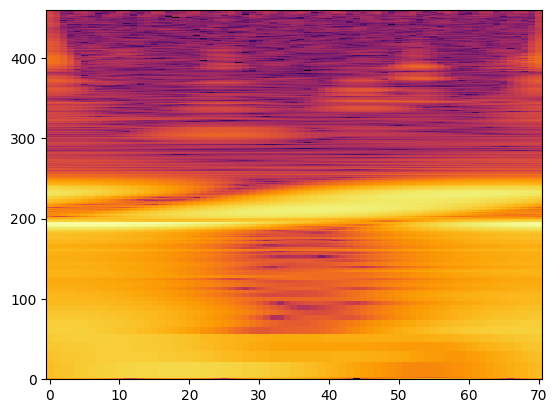

In [2]:
def plot_simple(c, transform_name):
    # plot the magnitude spectrogram
    # drop the channel dimension
    c = c.squeeze(0)

    plt.figure()
    plt.imshow(
        numpy.abs(c),
        aspect='auto',
        origin='lower',
        interpolation='nearest',
        norm='log',
        cmap='inferno'
    )
    plt.show()

plot_simple(c, transform_name)



tensor(6.1490)


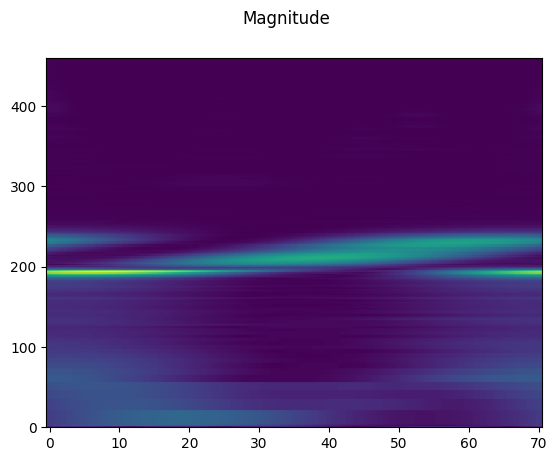

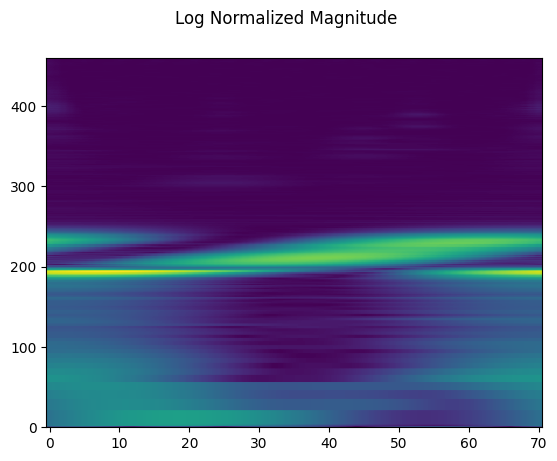

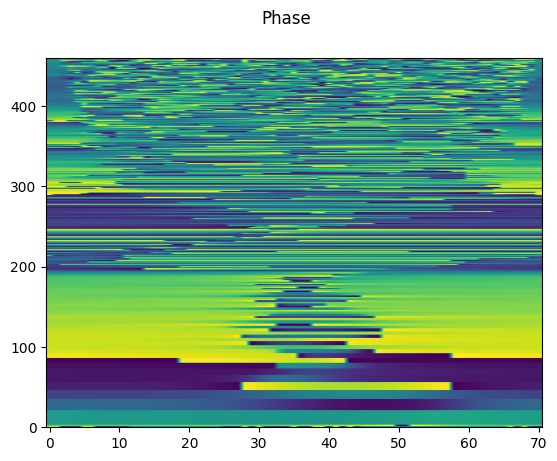

In [3]:
from tifffile import imwrite, imread

def rgb_complex_spectrum(c):
    # R -> magnitude
    # G -> log normalized magnitude (0 to 1)
    # B -> phase
    # plot the magnitude spectrogram

    # get the magnitude
    mag = torch.abs(c)

    # normalize the magnitude to log 

    logmag = numpy.log1p(mag)
    logmag /= mag.max()

    print (mag.max())

    # get the phase
    phase = torch.angle(c)

    # debug plots
    plt.figure().suptitle("Magnitude")
    plt.imshow(
        mag,
        aspect='auto',
        origin='lower',
    )
    plt.figure().suptitle("Log Normalized Magnitude")
    plt.imshow(
        logmag,
        aspect='auto',
        origin='lower',
    )
    plt.figure().suptitle("Phase")
    plt.imshow(
        phase,
        aspect='auto',
        origin='lower',
    )
    plt.show()

    return torch.stack([mag, logmag, phase], dim=-1)

    
import numpy as np
def export_mono(c):
    def orient_image(img):
        # flip top to bottom
        img = np.flipud(img)
        return img

    # export the coefficients to a file
    # drop the channel dimension
    c = c.squeeze(0)

    # get the magnitude
    spectrum = rgb_complex_spectrum(c)

    # convert to numpy
    spectrum = spectrum.numpy()

    # convert to image
    spectrum = orient_image(spectrum)

    
    imwrite("spectrogram.tiff", spectrum, photometric='rgb', dtype='float32')

    # save the image
    


def import_mono(c, transform_name):
    def orient_image(img):
        # orient the image
        img = img.transpose(Image.ROTATE_270)
        img = img.transpose(Image.FLIP_TOP_BOTTOM)
        return img
    
    
    # import the coefficients from a file




export_mono(c)
